# Regressão Linear

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline - libere essa linha se não rodar o gráfico no jupyter

import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos Dados

In [2]:
dados = pd.read_csv('Consumo_cerveja.csv', sep = ';')

In [3]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
#para verificar o tamanho do dataset

dados.shape

(365, 7)

## Análises Preliminares

### Estatísticas descritivas

In [5]:
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


### Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [6]:
#com o erro de str to float da data, primeiro precisamos fazer a conversão ou eliminar a coluna para fazer a matriz de correlação
dados_com_data = dados
dados = dados.drop(columns='data')
dados.head()

,temp_media,temp_min,temp_max,chuva,fds,consumo
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900


In [7]:
dados_com_data.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [8]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

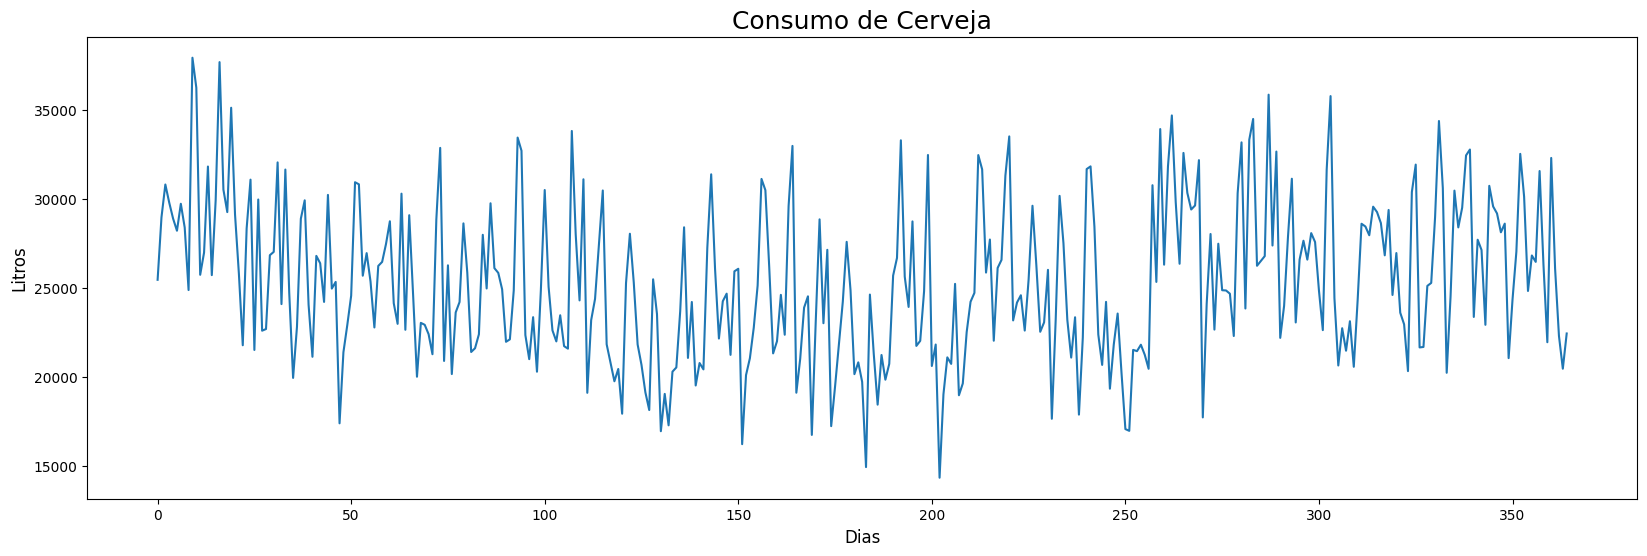

In [9]:
plt.figure(figsize = (20, 6))
ax = dados['consumo'].plot()
ax.set_title('Consumo de Cerveja', fontsize = 18)
ax.set_xlabel('Dias', fontsize = 12)
ax.set_ylabel('Litros', fontsize = 12)

plt.show()

#### Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [10]:
import seaborn as sns

### Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Consumo de cerveja'}, xlabel='Litros'>

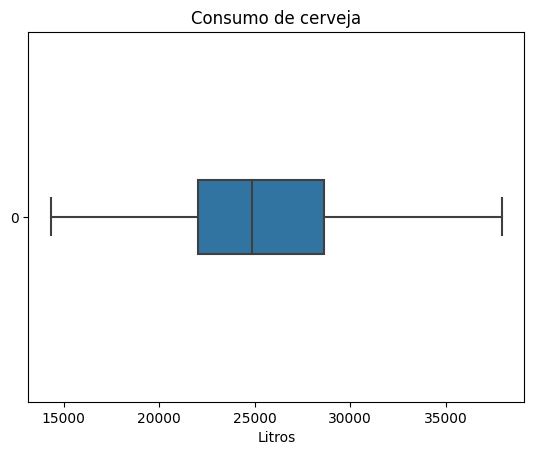

In [11]:
ax = sns.boxplot(data = dados['consumo'], orient='h', width= 0.2)
ax.set(title = 'Consumo de cerveja', xlabel = 'Litros')
ax


### Boxplot com duas variáveis

<Axes: title={'center': 'Consumo de cerveja'}, xlabel='Final de semana', ylabel='Litros'>

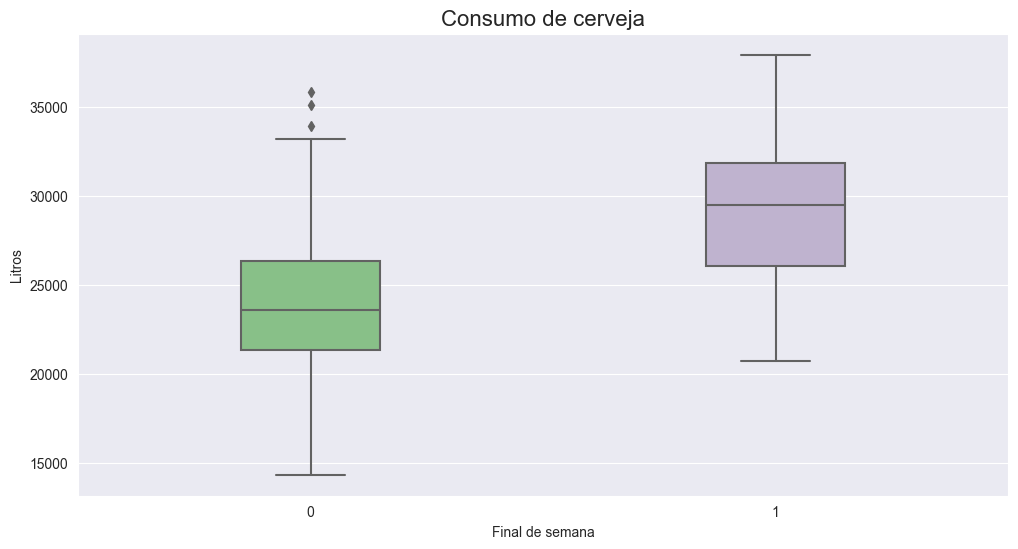

In [20]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid", )
sns.set_palette("Accent")

ax = sns.boxplot(x=dados.fds, y=dados.consumo, orient='v', width= 0.3)
ax.set_title('Consumo de cerveja', fontsize = 16)
ax.set(ylabel = 'Litros', xlabel = 'Final de semana')
ax

O que podemos entender a partir desse gráfico é que existe uma tendência a aumentar o consumo quando é final de semana.

## Distribuição de frequências

### Distribuição de frequências da variável dependente (Y)

<Figure size 1600x900 with 0 Axes>

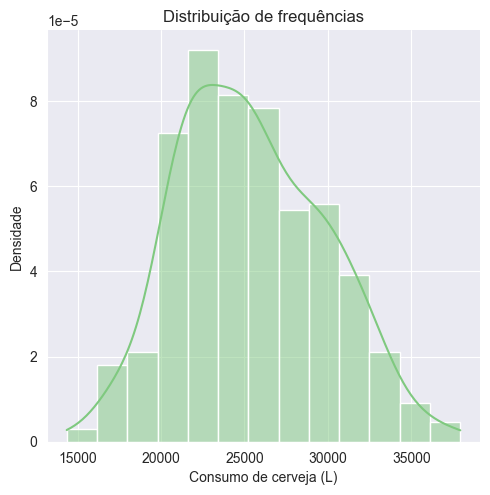

In [32]:
sns.set_style("darkgrid", )
sns.set_palette("Accent")
plt.figure(figsize=(16,9))

ax = sns.displot(dados.consumo, kde = True, kind = 'hist', stat='density')
ax.set(xlabel = 'Consumo de cerveja (L)', title = 'Distribuição de frequências', ylabel = 'Densidade')
ax

## Variável Dependente X Variáveis Explicativas (pairplot)

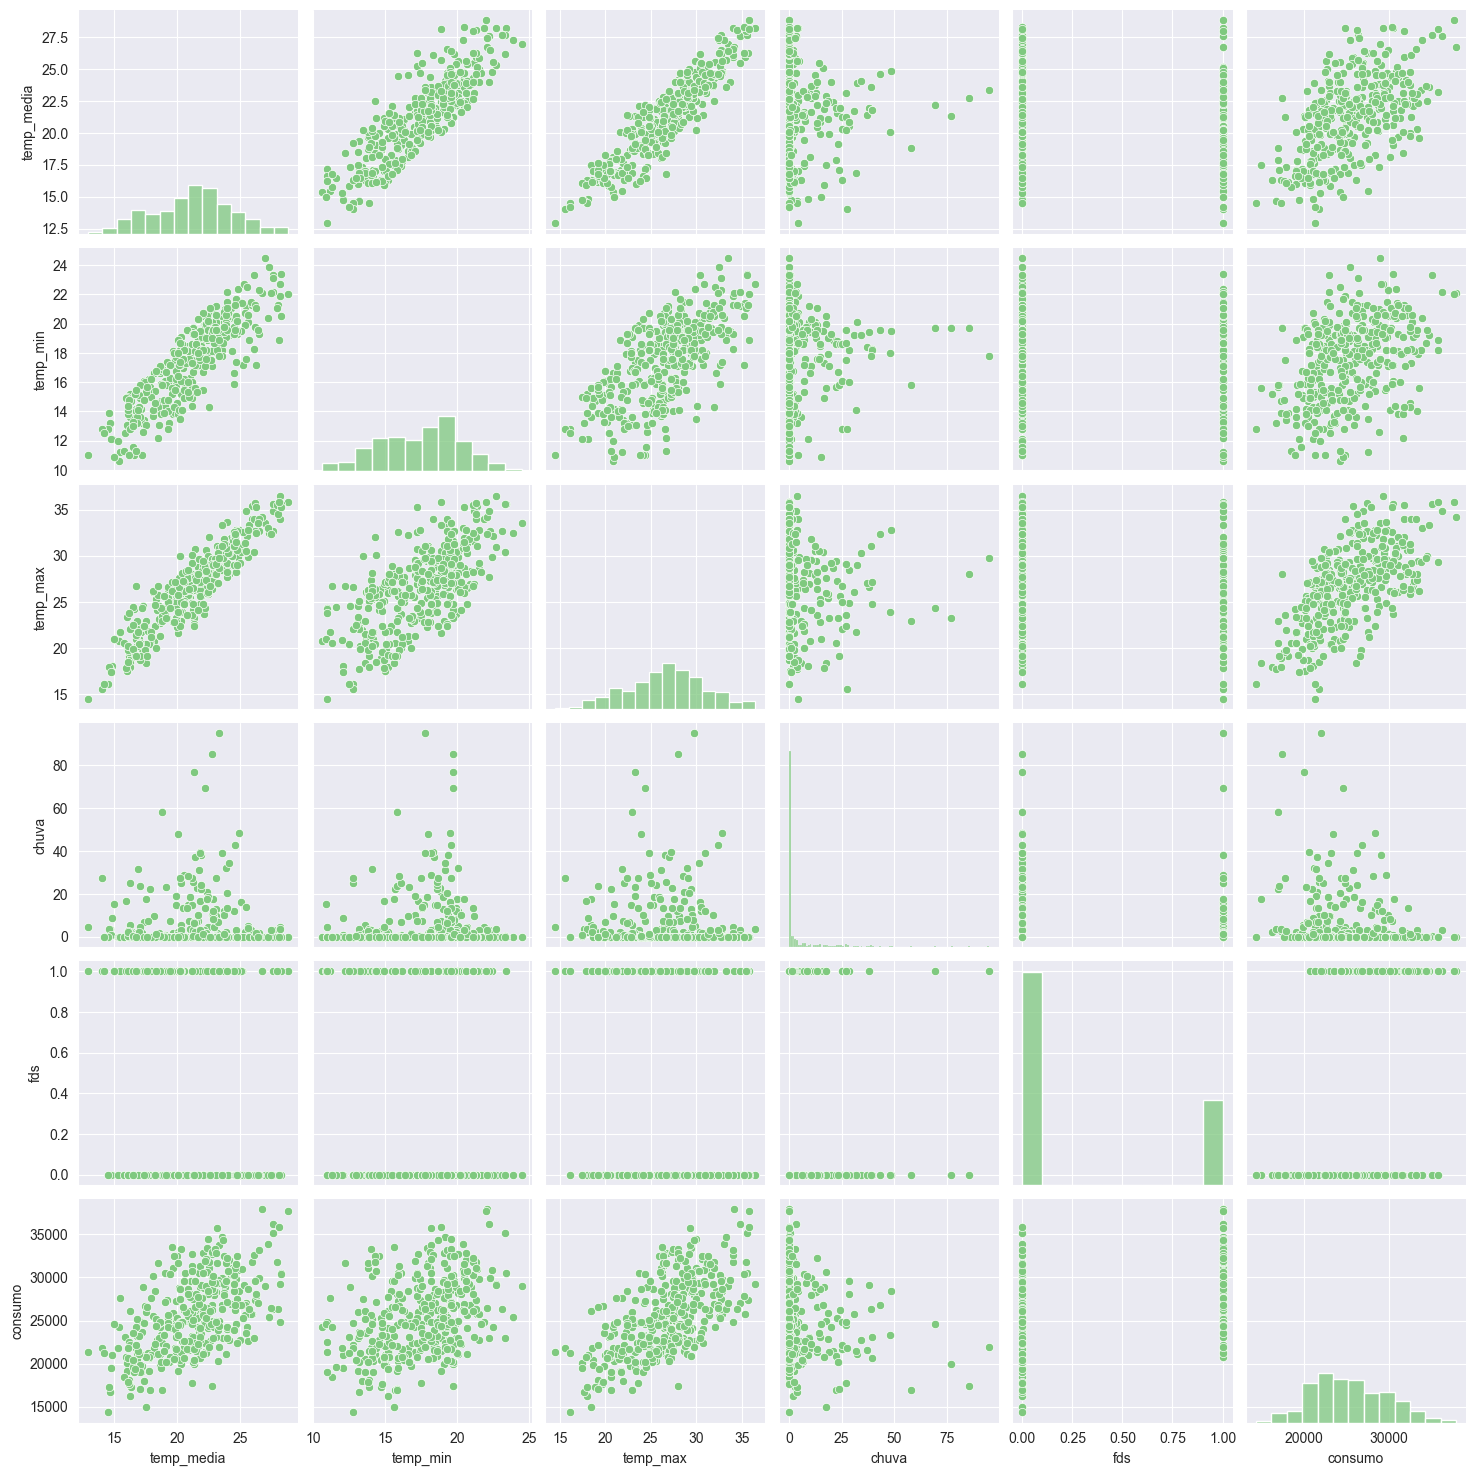

In [33]:
ax = sns.pairplot(dados)

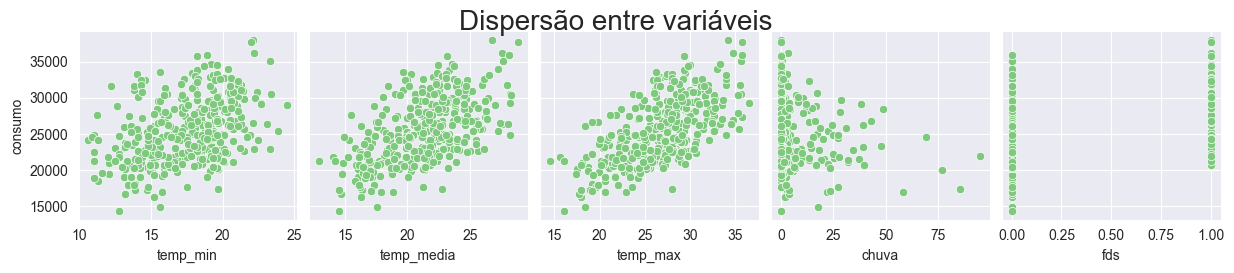

In [36]:
#criando o gráfico somente com as variáveis que interessam

ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.figure.suptitle('Dispersão entre variáveis', fontsize = 20, y = 1.05)
ax

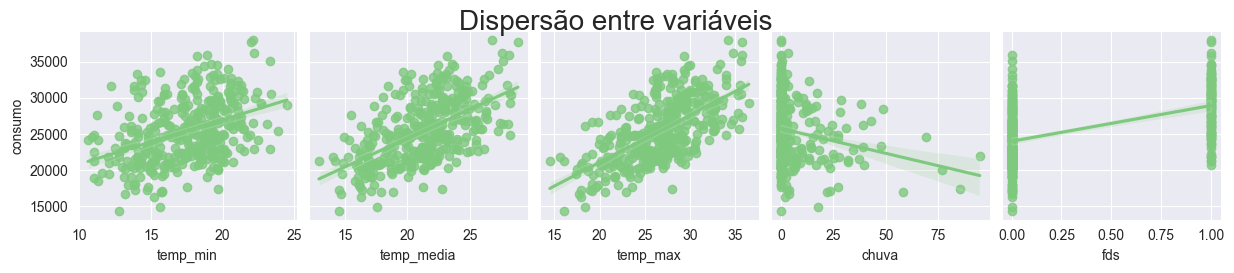

In [37]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind ='reg')
ax.figure.suptitle('Dispersão entre variáveis', fontsize = 20, y = 1.05)
ax